<a href="https://colab.research.google.com/github/SUNDAYTITILAYO/CMP700ACCESSMENT/blob/main/ACCESSMENT_PROGRESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Link to the App**: https://accessment-vvrdmpeugsccyn8bzqu7rk.streamlit.app/




**importing Neccessary Libraries**

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import plotly.io as pio
from sklearn import preprocessing
from ipywidgets import interact, Dropdown
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Mounting The Google Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd '/content/drive/MyDrive/'Programming for Data analytics/Accessment file/12 stations

/content/drive/MyDrive/Programming for Data analytics/Accessment file/12 stations


In [7]:
%ls

aqi_interactive_plot.html                     PRSA_Data_Dongsi_20130301-20170228.csv
aqi_interactive_plot_with_categories.html     PRSA_Data_Guanyuan_20130301-20170228.csv
correlation_heatmap.png                       PRSA_Data_Gucheng_20130301-20170228.csv
dominant_pollutants_all_stations.html         PRSA_Data_Huairou_20130301-20170228.csv
iframe_figures/                               PRSA_Data_Nongzhanguan_20130301-20170228.csv
merged_data.csv                               PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Aotizhongxin_20130301-20170228.csv  PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv     PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv      PRSA_Data_Wanshouxigong_20130301-20170228.csv


**Loading The Pandas Dataframe**

In [8]:
import pandas as pd
aotizhongxin = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
dingling = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
dongsi = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')
guanyuan = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv')
gucheng = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv')


**Merging the dataset From 6 Stations**

In [9]:
df = pd.concat([
    aotizhongxin, changping, dingling, dongsi, guanyuan, gucheng,
    ], ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
210380,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
210381,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
210382,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


**Observations:**
This data is 210,384 rows and 18 columns.
Not all columns are filled out, including pollutant levels (PM2.5, PM10, SO2, NO2, CO, O3).
The data are temporal (year, month, day, hour) and meteorological (TEMP, PRES, DEWP, RAIN, wd, WSPM).
The station column is the measurement location.

**Next Steps:**
Handle missing values.
Data preprocessing (e.g., categorical transformation, outlier handling).
Generate interactive visualizations for insights.

**Exploratory Data Analysis**

In [10]:
df.shape

(210384, 18)

**Creating a Date Column in datetime format for the dataset**

In [11]:
df['Date'] = pd.to_datetime(df[['year', 'month', 'day']])
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Date
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210379,35060,2017,2,28,19,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng,2017-02-28
210380,35061,2017,2,28,20,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng,2017-02-28
210381,35062,2017,2,28,21,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng,2017-02-28
210382,35063,2017,2,28,22,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng,2017-02-28


**Showing the columns in list format**

In [12]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'Date'],
      dtype='object')

In [13]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210384 entries, 0 to 210383
Data columns (total 19 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       210384 non-null  int64         
 1   year     210384 non-null  int64         
 2   month    210384 non-null  int64         
 3   day      210384 non-null  int64         
 4   hour     210384 non-null  int64         
 5   PM2.5    205894 non-null  float64       
 6   PM10     207065 non-null  float64       
 7   SO2      206447 non-null  float64       
 8   NO2      204532 non-null  float64       
 9   CO       198724 non-null  float64       
 10  O3       204281 non-null  float64       
 11  TEMP     210167 non-null  float64       
 12  PRES     210174 non-null  float64       
 13  DEWP     210167 non-null  float64       
 14  RAIN     210179 non-null  float64       
 15  wd       209705 non-null  object        
 16  WSPM     210214 non-null  float64       
 17  station  2

**CHECKING FOR THE MISSING VALUES**

In [14]:
Missing_values= df.isnull ().sum ()
Missing_values

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,4490
PM10,3319
SO2,3937
NO2,5852
CO,11660


**Percentage of Missing values**

In [15]:
 Missing_values_percent = 100 * df.isnull().sum() / len(df)
 Missing_values_percent


,0
No,0.000000
year,0.000000
month,0.000000
day,0.000000
hour,0.000000
PM2.5,2.134193
PM10,1.577591
SO2,1.871340
NO2,2.781580
CO,5.542247


**Finding The Percentage Of Misssing Values In each columns and Sorting Them In a descending order in a styled Table for easy readability.**

In [16]:

  Missing_Values_table= pd.concat([Missing_values, Missing_values_percent], axis=1)
  Missing_Values_table

  Missing_Values_table_ren_columns = Missing_Values_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  Missing_Values_table_ren_columns

  Missing_Values_table_ren_columns= Missing_Values_table_ren_columns.sort_values('% of Total Values', ascending=False).round(1)
  Missing_Values_table_ren_columns


  Missing_Values_table_ren_columns.style.background_gradient(cmap='Oranges')




,Missing Values,% of Total Values
CO,11660,5.500000
O3,6103,2.900000
NO2,5852,2.800000
PM2.5,4490,2.100000
SO2,3937,1.900000
PM10,3319,1.600000
wd,679,0.300000
DEWP,217,0.100000
TEMP,217,0.100000
PRES,210,0.100000


**Distribution plots of the Pollutants**.

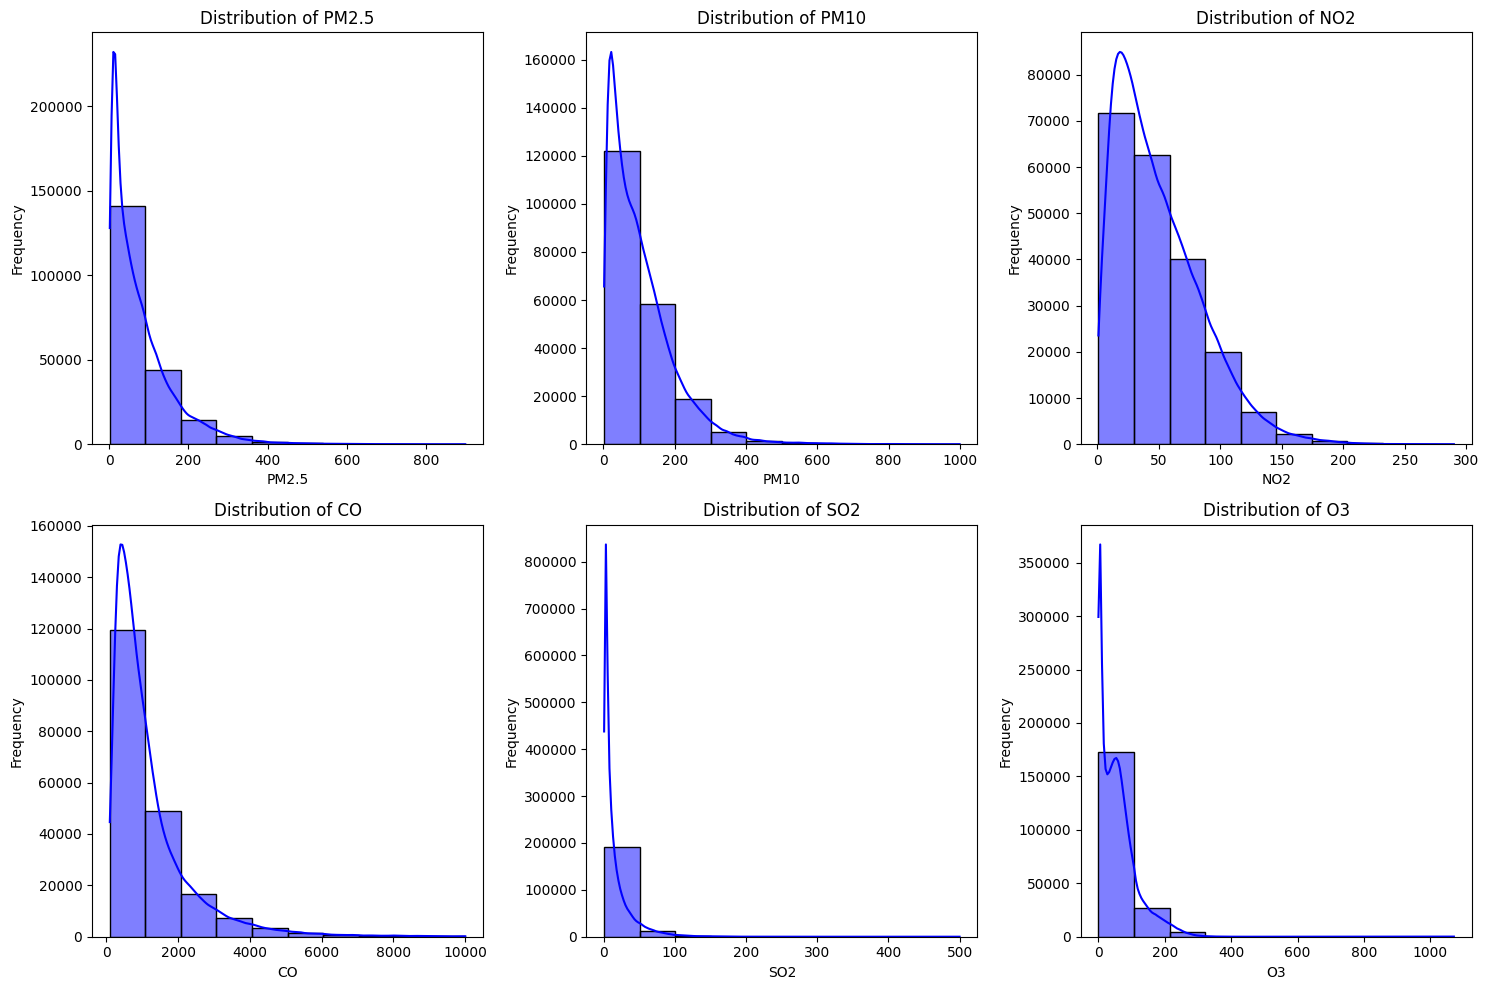

In [17]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

plt.figure(figsize=(15, 10))
for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[pollutant], kde=True, color='blue', bins=10)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**The distribution plots show:**

PM2.5 and PM10: Right-skewed distributions with most values concentrated in lower ranges

SO2 and NO2: Similar right-skewed patterns but with different scales

CO: Highly right-skewed with many outliers

O3: More symmetric distribution compared to other pollutants

**Filling The Missing Values**

In [18]:
# Handling missing values
# For numerical columns, we'll use mean imputation. For categorical columns, we'll use mode imputation.

# Numerical columns with missing values
numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Categorical column with missing values
#categorical_cols = ['wd']
#for col in categorical_cols:
    #df[col].fillna(df[col].mode()[0], inplace=True)

# Verify missing values are handled
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         679
WSPM         0
station      0
Date         0
dtype: int64


**Dropping the wd Column**

In [19]:
df = df.drop('wd', axis=1)



**Checking to see that there no more missing Values**

In [20]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**TOTAL NUMBER OF STATIONS IN THE DATASET**

In [21]:
stations= df['station'].value_counts()
print(f'Total number of stations in the dataset : {len(stations)}')
stations

Total number of stations in the dataset : 6


,count
station,
Aotizhongxin,35064
Changping,35064
Dingling,35064
Dongsi,35064
Guanyuan,35064
Gucheng,35064


**VISUALISATIONS**

**SEASONAL PLOTS OF THE POLLUTANTS**

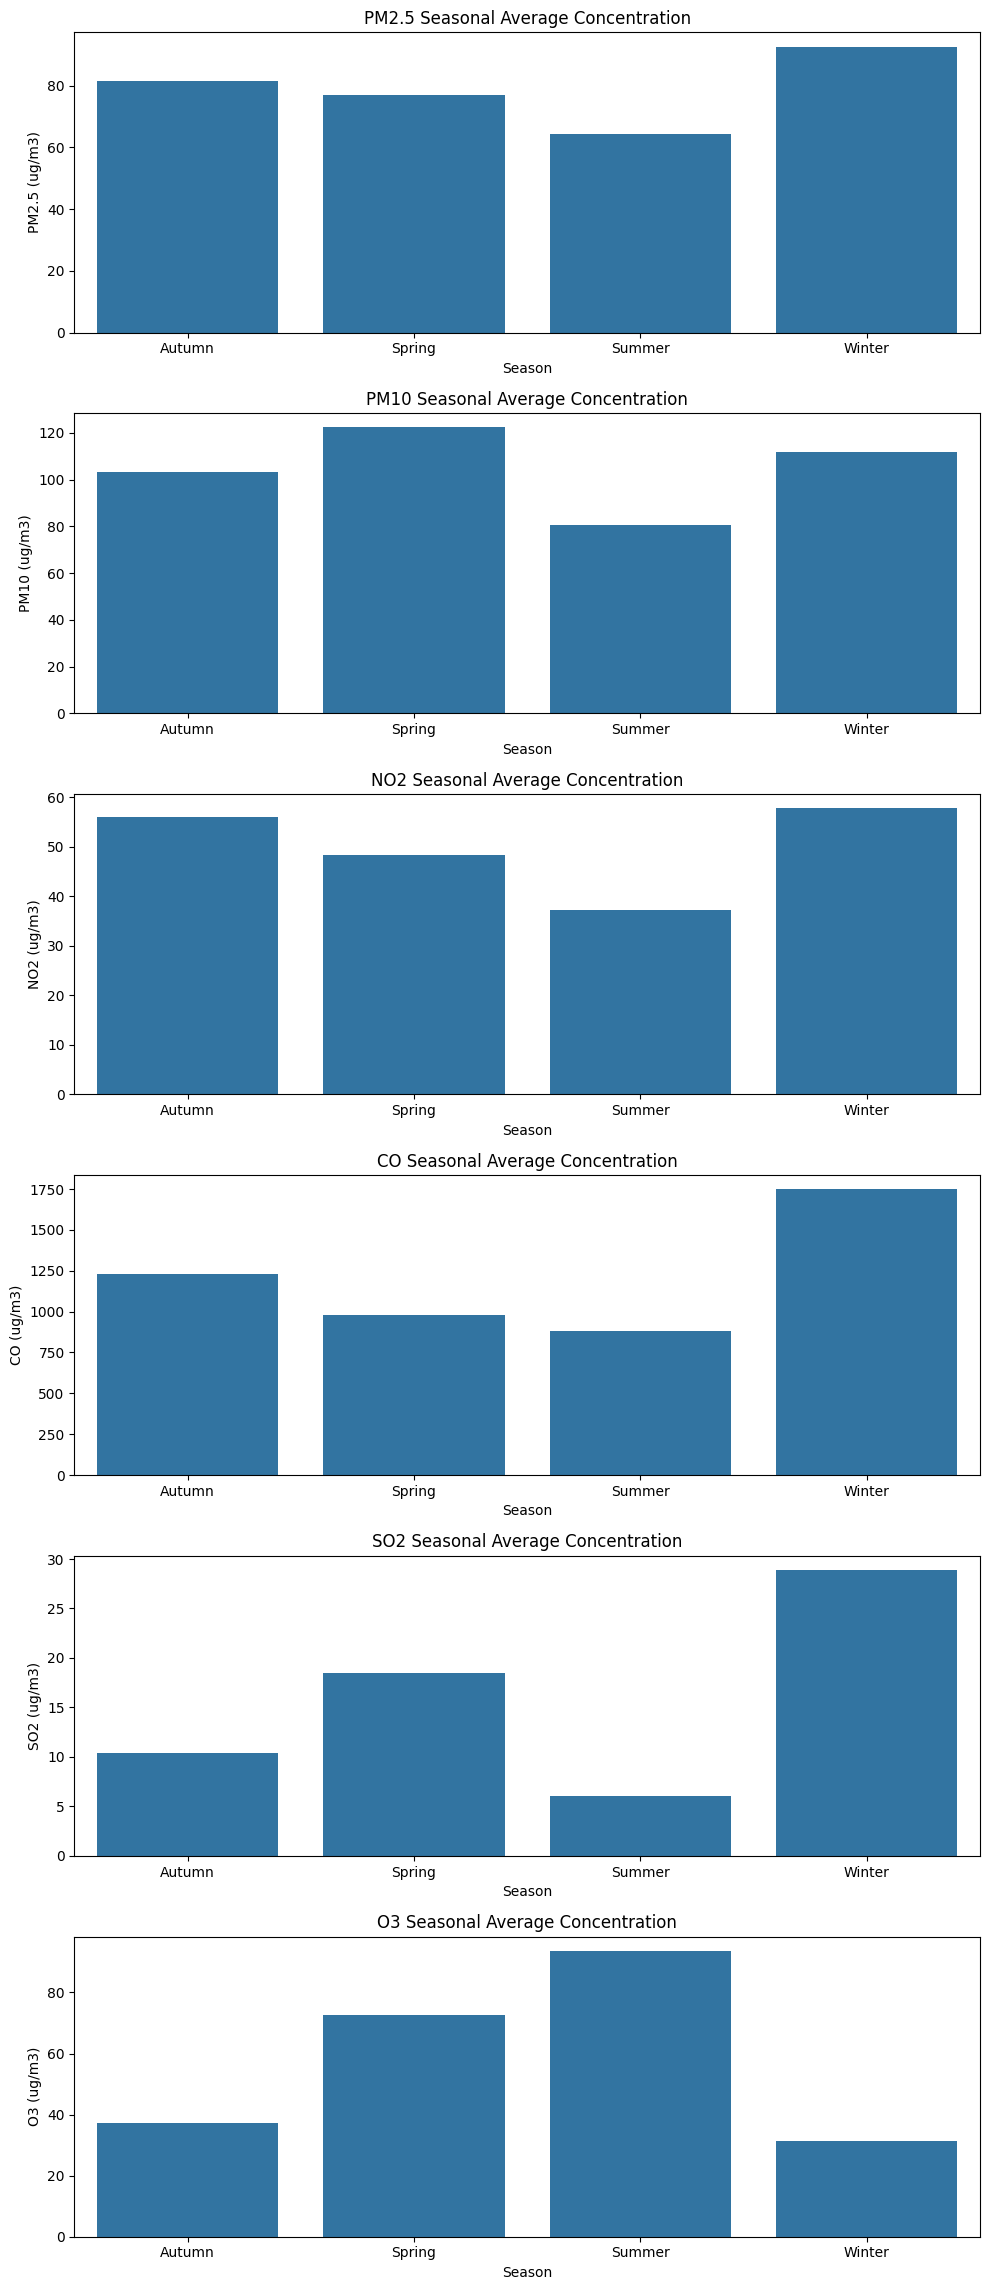

In [22]:

# Define a function to map months to season
pollutants =  ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3',]
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Unknown'

# Apply the function to create a new 'season' column
df['season'] = df['month'].apply(get_season)

# Group data by season and calculate the mean of each pollutant
seasonal_pollution_means = df.groupby('season')[pollutants].mean()


# Plotting the seasonal average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 25), sharex=False)
fig.subplots_adjust(hspace=0.5)


for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    sns.barplot(x=seasonal_pollution_means.index, y=seasonal_pollution_means[pollutant], ax=ax)  # Use seaborn for barplot
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Seasonal Average Concentration')
    ax.set_xlabel('Season')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

**Observation:** The seasonal plots of the pollutants above shows that;
Concentration of Ozone(O3) was highest during the summer season
Concentration of SO2 and CO was highest during the Winter season
Concentration of NO2 was high in both winter and
Concentration of PM10 was highest in spring
Concentration of PM2.5 was hihgest during summer.

**The ozone(O3)** Concentration is usually high during summer because as the weather heats up during summer,the pollutants reacts to heat and sunlight thereby increasing the ground level ozone pollutions.

**PM10** is highest during the spring as a result of dust storms that usually occur in the spring season.  



**PM2.5 LEVELS BY SEASON**

Weather Conditions Summary:
When PM2.5 is HIGH (> 56.0 ):
            TEMP       PRES       DEWP       RAIN       WSPM
count  104324.00  104324.00  104324.00  104324.00  104324.00
mean       13.51    1009.51       5.25       0.06       1.38
std        11.35       9.65      12.32       0.85       0.94
min       -14.40     982.70     -33.40       0.00       0.00
25%         3.00    1001.70      -5.10       0.00       0.80
50%        14.50    1009.30       5.30       0.00       1.20
75%        23.48    1016.90      16.50       0.00       1.80
max        41.10    1038.50      28.80      72.50       9.60
When PM2.5 is LOW (<= 56.0 ):


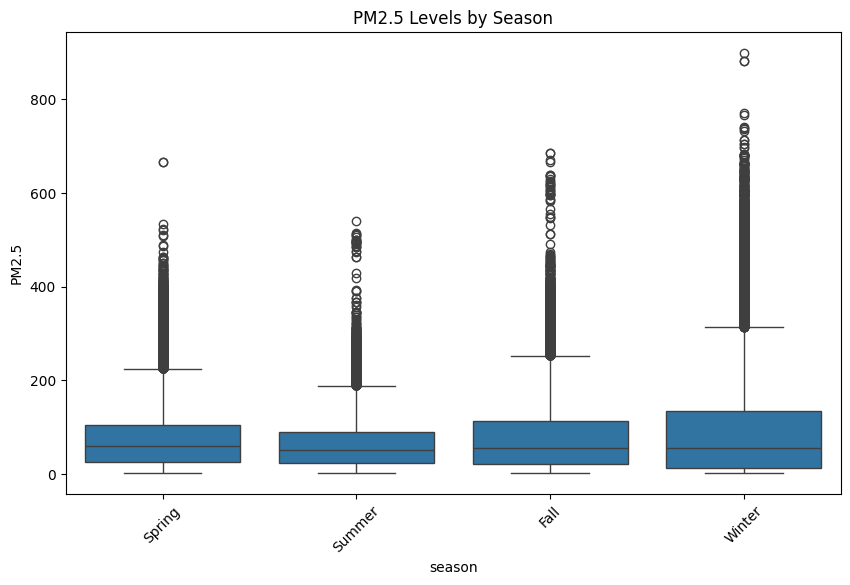

In [23]:

# Calculate summary statistics for each weather condition when PM2.5 is high vs low
pm25_threshold = df['PM2.5'].median()  # Using median as threshold

high_pm25 = df[df['PM2.5'] > pm25_threshold]
low_pm25 = df[df['PM2.5'] <= pm25_threshold]

weather_features = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

print("Weather Conditions Summary:")

print("\
When PM2.5 is HIGH (>", round(pm25_threshold, 2), "):")
print(high_pm25[weather_features].describe().round(2))
print("\
When PM2.5 is LOW (<=", round(pm25_threshold, 2), "):")
df1=low_pm25[weather_features].describe().round(2)
df1
 # Calculate seasonal patterns
df['season'] = pd.to_datetime(df[['year', 'month', 'day']]).dt.month.map(
    {12:'Winter', 1:'Winter', 2:'Winter',3:'Spring', 4:'Spring', 5:'Spring',
       6:'Summer', 7:'Summer', 8:'Summer',     9:'Fall', 10:'Fall', 11:'Fall'})

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='PM2.5', data=df)
plt.title('PM2.5 Levels by Season')
plt.xticks(rotation=45)
plt.show()



**OBSERVATION:**

**Seasonal Variation:**

Winter exhibits the highest PM2.5 levels, with a wider range and higher median compared to other seasons.

Summer shows the lowest PM2.5 levels, indicating better air quality during this period.

**Improved Air Quality in Summer:**

Summer's lower PM2.5 levels could be attributed to better dispersion conditions (e.g., higher wind speeds) and reduced emissions.

**Spring and Fall Transition:**

Spring and fall show intermediate PM2.5 levels, acting as transitional periods between the extremes of winter and summer.


**AVERAGE PM2.5 LEVELS BY STATION**

In [24]:
# Calculate additional statistics for each station
station_stats = df.groupby('station').agg({
    'PM2.5': ['mean', 'std', 'min', 'max', 'count']
}).round(2)

station_stats.columns = ['Mean PM2.5', 'Std Dev', 'Min PM2.5', 'Max PM2.5', 'Number of Readings']
print("\
Detailed Station Statistics:")
df2=station_stats.sort_values('Mean PM2.5', ascending=False)
df2




Detailed Station Statistics:


,Mean PM2.5,Std Dev,Min PM2.5,Max PM2.5,Number of Readings
station,,,,,
Dongsi,86.04,85.65,3.0,737.0,35064
Gucheng,83.76,82.03,2.0,770.0,35064
Guanyuan,82.86,80.22,2.0,680.0,35064
Aotizhongxin,82.67,81.05,3.0,898.0,35064
Changping,71.27,71.53,2.0,882.0,35064
Dingling,66.27,71.49,3.0,881.0,35064


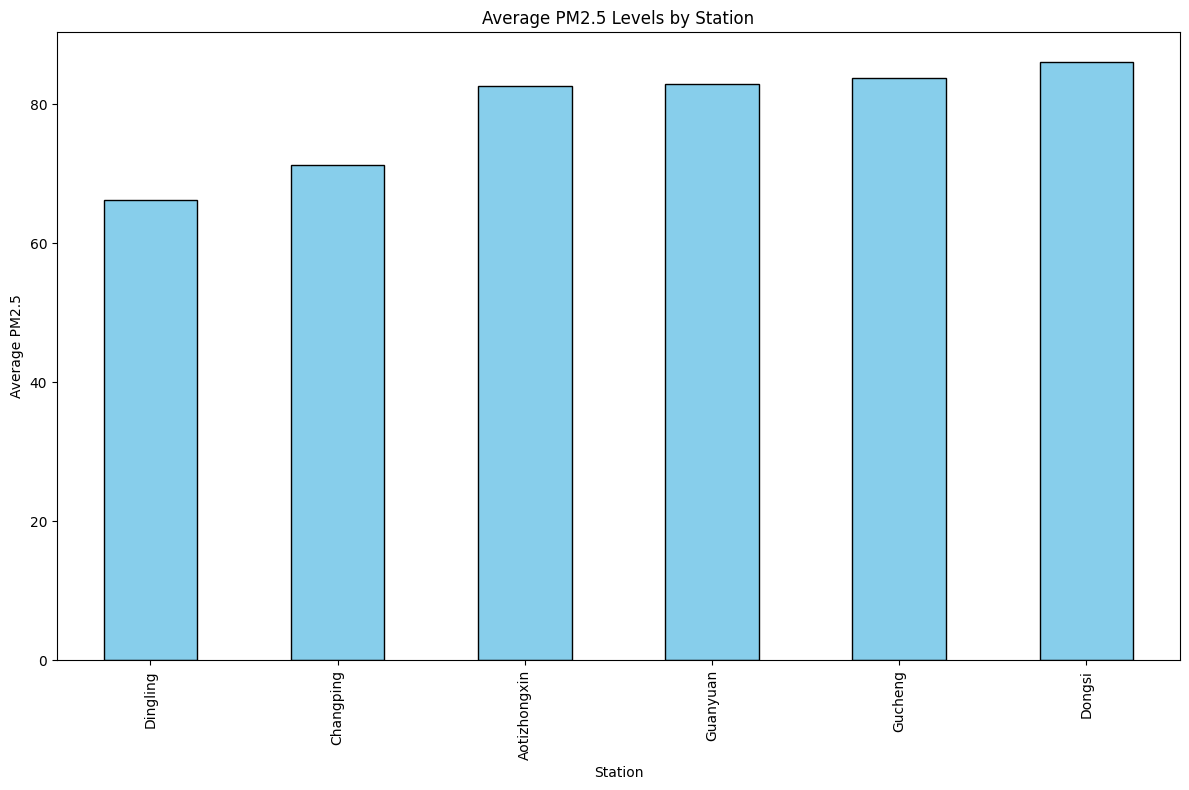

In [25]:

# Grouping by station and calculating the mean AQI
PM25_station = df.groupby('station')['PM2.5'].mean().sort_values()

# Plotting the average AQI by station
plt.figure(figsize=(12, 8))
PM25_station.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average PM2.5 Levels by Station')
plt.xlabel('Station')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**OBSERVATION:**
Spatial Variation:

Dongsi station shows the highest average PM2.5 concentration (86.19 µg/m³)

followed closely by Gucheng (83.85 µg/m³) and Guanyuan (82.93 µg/m³)

Dingling station records the lowest average PM2.5 levels (65.99 µg/m³),

significantly lower than other stations
The difference between the highest (Dongsi) and lowest (Dingling) is approximately 20 µg/m³, indicating substantial spatial variation in air quality

The higher readings in Dongsi, Gucheng, and Guanyuan suggest these are likely in dense urban areas with more pollution sources

Dingling and Changping, with lower readings, are probably in less urbanized areas or might have more vegetation coverage

This pattern suggests a clear urban-suburban gradient in air quality

**VISUALISATION**

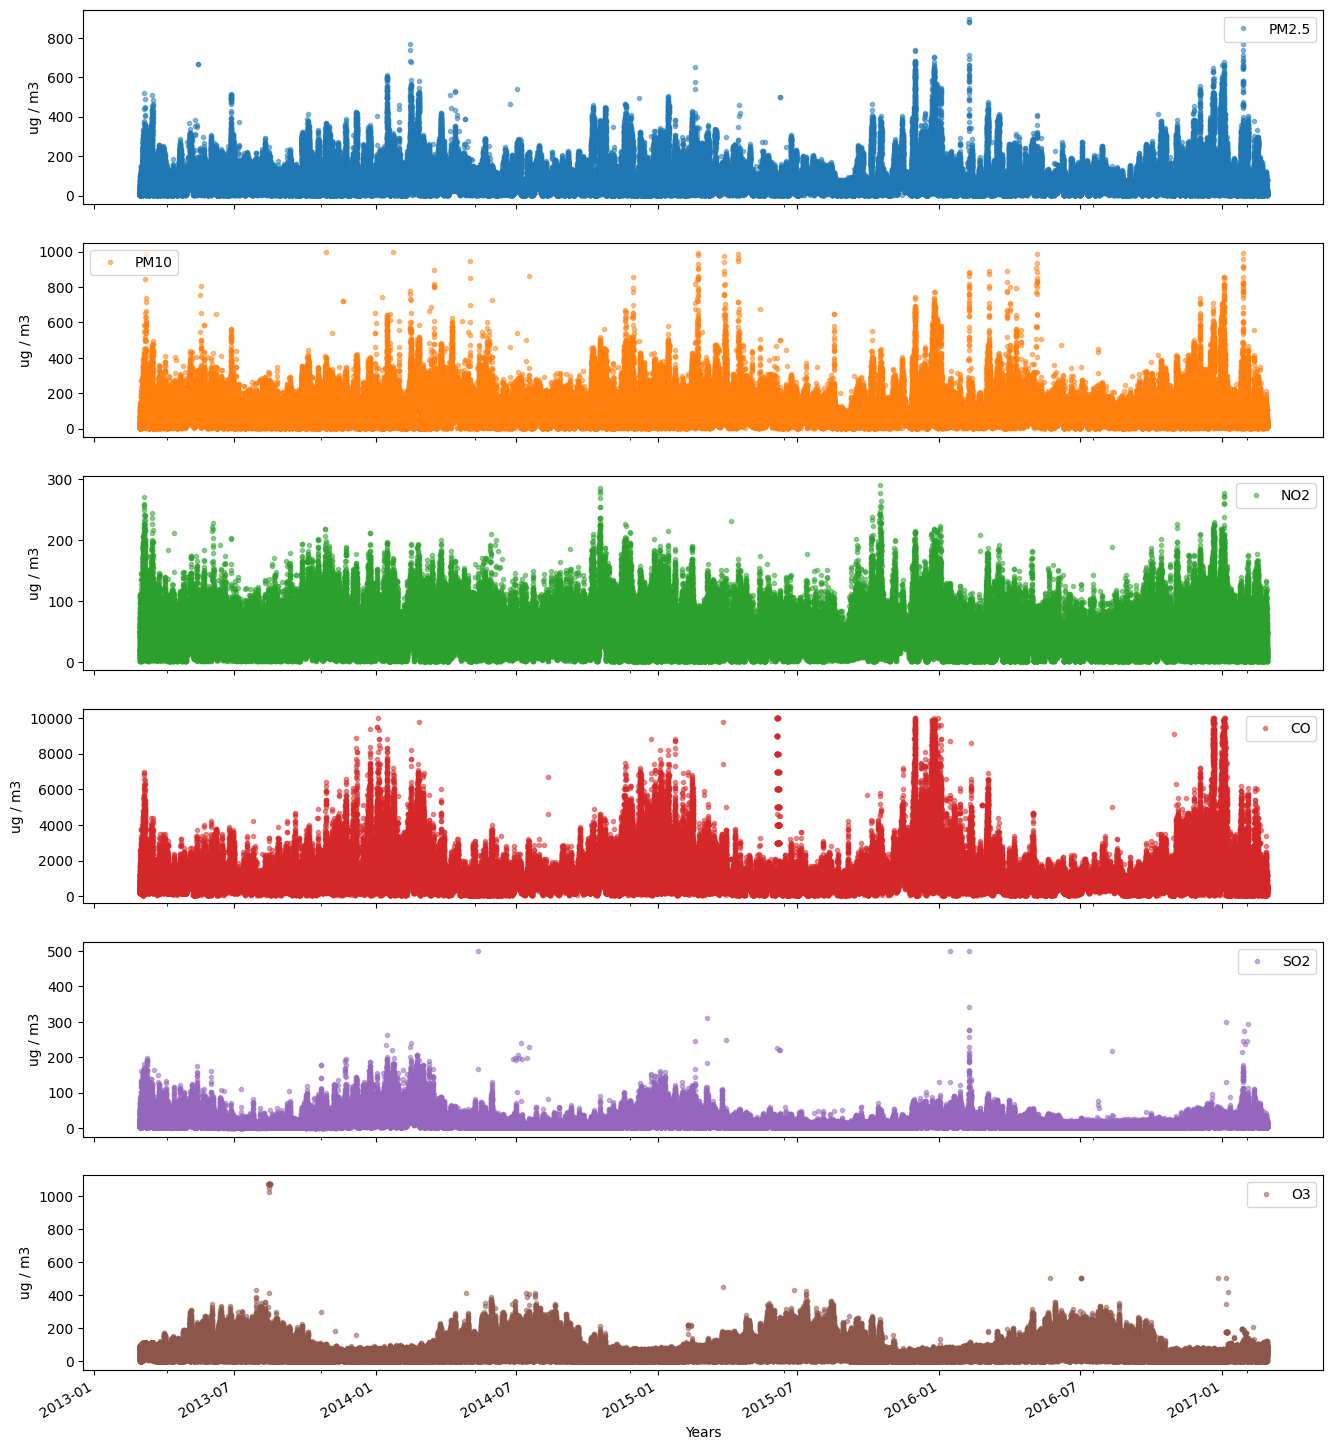

In [26]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3',]
df.set_index('Date',inplace=True)
axes = df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:

    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

**YEARWISE PLOT OF THE POLLUTANTS**

In [27]:
 df_melted = df.melt(id_vars=['year', 'month'], value_vars=pollutants,
                        var_name='Pollutant', value_name='Concentration')

# Group data by Year, Month, and Pollutant, and calculate the average concentration
df_grouped = df_melted.groupby(['year', 'month', 'Pollutant'], as_index=False)['Concentration'].mean()

# Sort the months to ensure correct order in the sunburst chart
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
# Assuming 'month' column represents month number (1-12)
df_grouped['month_name'] = df_grouped['month'].apply(lambda x: month_order[x - 1])  # Convert month number to month name
df_grouped['Month'] = pd.Categorical(df_grouped['month_name'], categories=month_order, ordered=True)

# ... (Rest of your code)
# Create the Sunburst Chart
#st.subheader("Sunburst Chart: Monthly Average Concentration of Pollutants")
fig = px.sunburst(df_grouped,
                      path=['year', 'Month', 'Pollutant'],  # Changed 'Year' to 'year'
                      values='Concentration',
                      color='Concentration',
                      color_continuous_scale='Viridis',
                      title="Monthly Average Concentration of Pollutants Over Time")

# Display the Sunburst Chart
fig.show() # Changed plt.show to fig.show()


**Observation:**
The Sunburst shows that CO has the most concentrations over time.

**MONTHWISE PLOT OF THE POLLUTANTS**

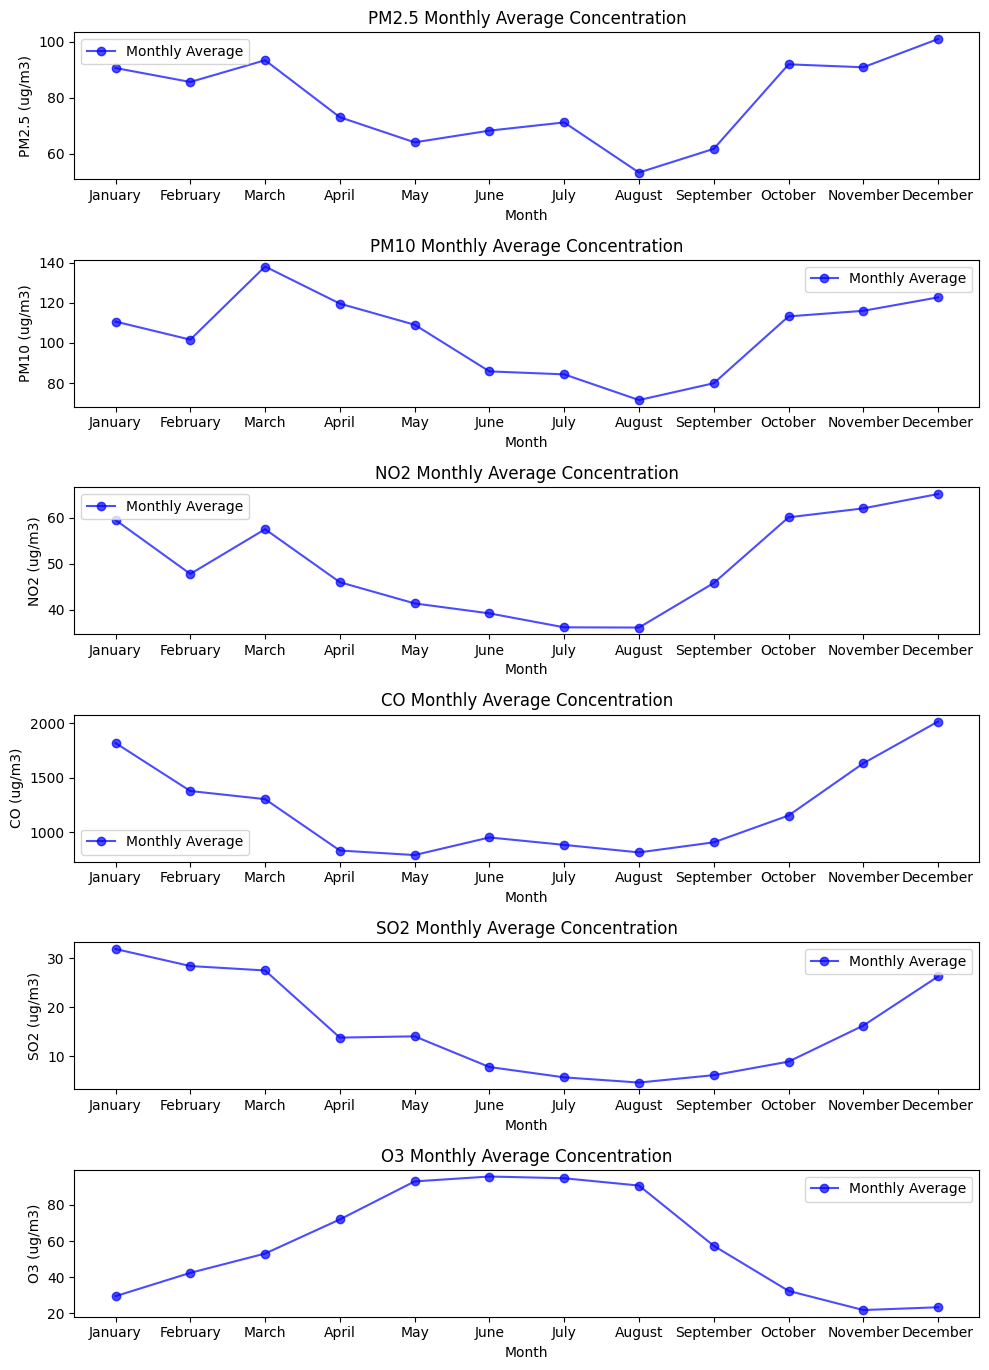

In [28]:
# Group by Month to calculate the monthly average for each pollutant
monthly_avg = df.groupby('month')[pollutants].mean()
monthly_avg

# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 15), sharex=False)

# Define month names for x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(month_names, monthly_avg[pollutant], marker='o', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration')
    ax.legend()
    ax.set_xlabel('Month')  # Set x-axis label

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
#fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)


plt.show()


The plot above shows that;
 PM2.5 has highest concentration in the month of December and January and it has lowest concentration in the month of August,
 PM10 has its highest concentration in the month of March and its lowest concentration in the month of August.
 NO2 has its highest concentration in the month of December and its lowest concentration in the month of July.
 CO has it's highest concentration in December and it's lowest concentration in the month of May and August
 O3 has a record high concentration in the month of May, June,July respectively and it's lowest concentration in the month of  November and December.
 The monthly average concentrations of PM2.5,PM10,NO2,CO is highest in the month of December while the concentration is at the lowest in the month of August.


**Most Dominant Pollutants:**

In [29]:
pollutants =  ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3',]
pol=df[pollutants].mean()
pollutants_df=pol.to_frame().reset_index()
pollutants_df.columns=['Pollutant','Level']
pollutants_df

,Pollutant,Level
0,PM2.5,78.811668
1,PM10,104.468581
2,NO2,49.784725
3,CO,1207.219752
4,SO2,15.929160
5,O3,58.918974


**DOMINANT POLLUTANTS ACROSS THE SIX STATIONS.**

In [32]:

# Calculate the mean concentration of pollutants for each station
station_pollutants = df.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Create a single interactive pie chart with subplots for each station
fig = px.pie(
    station_pollutants.reset_index().melt(id_vars='station'),
    values='value',
    names='variable',
    facet_col='station',
    facet_col_wrap=2,
    title="Dominant Pollutants Across Stations",
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Update layout for better visualization
fig.update_layout(
    showlegend=True,
    width=1200,
    height=800,
    title_x=0.5
)

# Show the interactive plot directly in the notebook
pio.show(fig)

**Observation:**

CO consistently shows the highest concentrations across most stations due to its measurement scale.

PM10 and PM2.5 show significant proportions at all stations.

Each station has a unique pollution profile, reflecting local emission sources.

O3 and NO2 show varying proportions across different stations.

SO2 generally shows smaller proportions compared to other pollutants

**DOMINANT POLLUTANT STATIONWISE**

In [33]:

pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

# Group data by 'State' and calculate the mean of each pollutant
stationwise_pollution_means = df.groupby('station')[pollutants].mean()

# Find the dominant pollutant in each state
dominant_pollutant_by_stations = stationwise_pollution_means.idxmax(axis=1)

# Convert the result to a DataFrame for better readability
dominant_pollutant_df = dominant_pollutant_by_stations.reset_index()
dominant_pollutant_df.columns = ['station', 'Dominant Pollutant']

# Display the results
dominant_pollutant_df

,station,Dominant Pollutant
0,Aotizhongxin,CO
1,Changping,CO
2,Dingling,CO
3,Dongsi,CO
4,Guanyuan,CO
5,Gucheng,CO


It is apparent from the table that CO is the most dominant pollutant accross the six stations.

**CORRELATION BETWEEN DIFFERENT POLLUTANTS.**

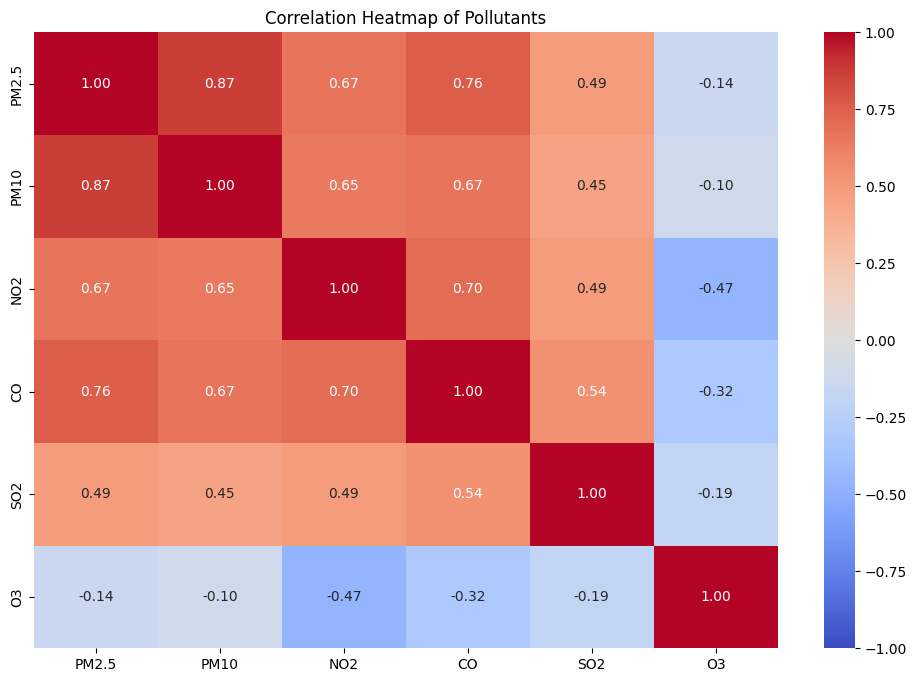

In [34]:

pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']
numeric_pollutants_df = df[pollutants]

# Convert data to numeric (this will handle any non-numeric values)
numeric_pollutants_df = numeric_pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (if any)
numeric_pollutants_df = numeric_pollutants_df

# Calculate the correlation matrix
correlation_matrix = numeric_pollutants_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pollutants')
plt.show()

In [35]:
numeric_pollutants_df.corr()

,PM2.5,PM10,NO2,CO,SO2,O3
PM2.5,1.000000,0.870716,0.668561,0.761766,0.485124,-0.142357
PM10,0.870716,1.000000,0.647818,0.671638,0.451902,-0.104781
NO2,0.668561,0.647818,1.000000,0.697768,0.488164,-0.466354
CO,0.761766,0.671638,0.697768,1.000000,0.542975,-0.316302
SO2,0.485124,0.451902,0.488164,0.542975,1.000000,-0.188120
O3,-0.142357,-0.104781,-0.466354,-0.316302,-0.188120,1.000000


**AVERAGE POLLUTANT LEVEL ACROSS STATIONS**

**PLOTTING AVERAGE POLLUTANT LEVEL ACCROSS STATIONS USING BARCHART**

In [36]:
import plotly.graph_objects as go
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
station_means = df.groupby('station')[pollutants].mean().reset_index()

# Create figure
fig = go.Figure()

# Add traces for each pollutant
for pollutant in pollutants:
    fig.add_trace(
        go.Bar(
            name=pollutant,
            x=station_means['station'],
            y=station_means[pollutant],
            visible=True
        )
    )

# Create dropdown menu
dropdown_buttons = [
    dict(
        label=pollutant,
        method="update",
        args=[
            {"visible": [p == pollutant for p in pollutants]},
            {"title": f"Average {pollutant} Levels Across Stations"}
        ]
    ) for pollutant in pollutants
]

# Add "All Pollutants" option
dropdown_buttons.insert(0,
    dict(
        label="All Pollutants",
        method="update",
        args=[
            {"visible": [True] * len(pollutants)},
            {"title": "Average Pollutant Levels Across Stations"}
        ]
    )
)

# Update layout with improved dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=dropdown_buttons,
            direction="down",
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top",
            bgcolor='white',
            font=dict(size=12)
        )
    ],
    title="Average Pollutant Levels Across Stations",
    title_x=0.5,
    xaxis_title="Monitoring Stations",
    yaxis_title="Concentration Level",
    showlegend=True,
    height=600,
    barmode='group'
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Add annotation for instructions
fig.add_annotation(
    text="Use dropdown to view specific pollutants or all pollutants together",
    xref="paper", yref="paper",
    x=0, y=1.1,
    showarrow=False,
    font=dict(size=12)
)

# Display the plot
fig.show()

# Print summary statistics for verification
print("\
Summary of pollutant levels by station:")
print(station_means.round(2))

Summary of pollutant levels by station:
        station  PM2.5    PM10    SO2    NO2       CO     O3
0  Aotizhongxin  82.67  109.95  17.34  59.03  1260.12  56.48
1     Changping  71.27   94.82  14.98  44.29  1154.68  57.96
2      Dingling  66.27   84.13  11.84  28.37   922.24  68.21
3        Dongsi  86.04  110.24  18.48  53.52  1318.87  57.24
4      Guanyuan  82.86  108.97  17.57  57.75  1268.09  55.90
5       Gucheng  83.76  118.71  15.37  55.76  1319.31  57.72


**Observation:**
The chart above shows that the pollutant levels are significantly different at each station. Stations like Dongsi and Gucheng, for instance, are higher in PM2.5 and PM10, whereas Dingling is relatively low. That indicates regional variation in air quality that’s probably due to sources and environmental factors.

**PLOTING THE LINEAR CORRELATION OF THE POLLUTANTS**

In [37]:
pollutants_df

,Pollutant,Level
0,PM2.5,78.811668
1,PM10,104.468581
2,NO2,49.784725
3,CO,1207.219752
4,SO2,15.929160
5,O3,58.918974


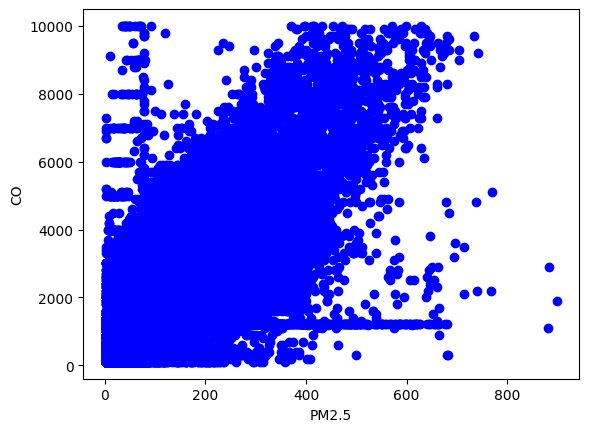

In [38]:
import matplotlib.pyplot as plt
plt.scatter(df['PM2.5'], df['CO'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("CO")
plt.show()

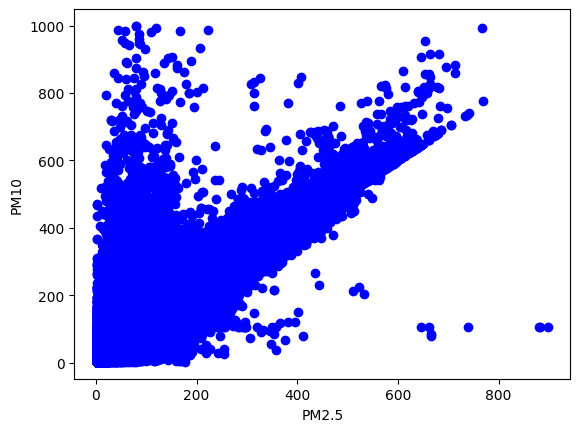

In [39]:
plt.scatter(df['PM2.5'], df['PM10'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.show()

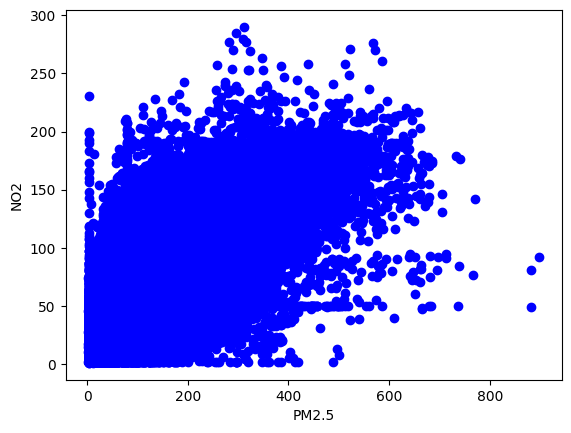

In [40]:
plt.scatter(df['PM2.5'], df['NO2'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("NO2")
plt.show()

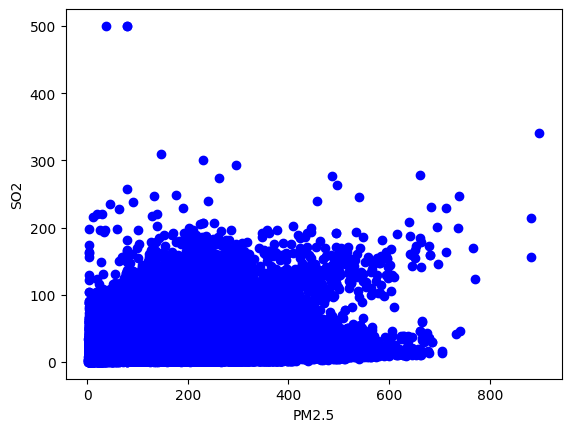

In [41]:
plt.scatter(df['PM2.5'], df['SO2'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("SO2")
plt.show()

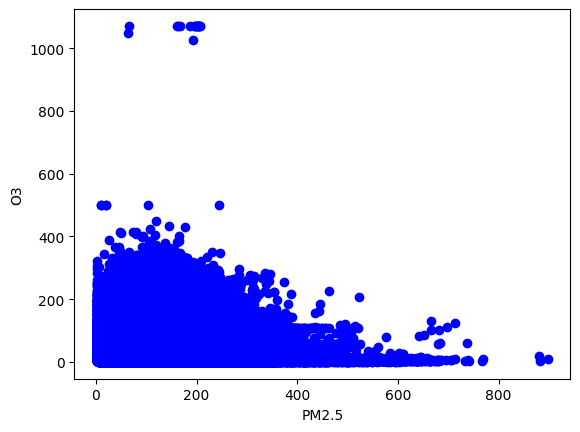

In [42]:
plt.scatter(df['PM2.5'], df['O3'], color='blue')
plt.xlabel("PM2.5")
plt.ylabel("O3")
plt.show()

The above plottings shows that nearly all the pollutants are linearly correlated with Pm2.5, though not perfect but there is a significant level of correlation enough to attempt a Machine learning Model.

  **BUILDING MACHINE LEARNING MODELS WITH THE DATASET**

**Splitting the dataset into Dependent(Y) and Independent(X) Variable.**

In [43]:
x = df[['PM10','NO2','CO','SO2','O3']]
X= x.values
X

array([[  4.,   7., 300.,   4.,  77.],
       [  8.,   7., 300.,   4.,  77.],
       [  7.,  10., 300.,   5.,  73.],
       ...,
       [ 37.,  52., 600.,   7.,  27.],
       [ 23.,  13., 400.,   3.,  57.],
       [ 48.,  48., 600.,   5.,  28.]])

In [44]:
y= df['PM2.5']
Y= y.values
Y

array([ 4.,  8.,  7., ..., 22.,  9., 12.])

In [45]:

from sklearn.model_selection import train_test_split # Import the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

**Splitting the data into training and Testing data**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**1) Building a Model Using Multiple Regression**

In [47]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
# fitting the training data
regr.fit(X_train,y_train)

LinearRegression()

In [48]:

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [0.53906865 0.17028751 0.02153423 0.05192868 0.07936567]
Intercept: -17.512364458010524


In [49]:
y_prediction =  regr.predict(X_test)
y_prediction

array([193.87468136,  17.00737957,  78.78095684, ..., 107.47311117,
       104.3458936 ,  42.85837874])

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mae
y_pred = regr.predict(X_test)

In [51]:
print ("Mean absolute error: %.2f" % mae (y_test,y_pred))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_prediction-y_test)**2))
print("R2-score: %.2f" % r2_score(y_prediction,y_test))

Mean absolute error: 1121.76
Residual sum of squares (MSE): 1121.76
R2-score: 0.78



An R2 score of 0.79 indicates that the model explains approximately 79% of the variance in the target variable ('PM2.5'). This is a solid score, suggesting that the model effectively captures a substantial portion of the patterns in the data.

**2) Building A model with the Dataset Using KNN Algorithm**

In [52]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)#calculates the mean and sd of each feature and apply it the sd formular to the training dataset.
X_test_scaled = scaler.transform(X_test)

**Creating And Training The kNN Regression Model .**

In [53]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [54]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

**INSPECTING THE MODEL FIT WITH SCIKIT-LEARN**

We have to first evaluate the prediction Error on the Training Data before by using it to make prediction.

In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt
Training_predict = knn_model.predict(X_train_scaled)
mse = mean_squared_error(y_train, Training_predict)
rmse = sqrt(mse)
rmse

19.27193987749923

**Evaluating The Model Performance on Testing Data**


To create a more accurate performance of the model, we have to evaluate its prediction error from a new dataset that the model is not familiar with. in this case, I am using the Test data that I set aside for this purpose from the data splitting stage above.

In [56]:
y_predict = knn_model.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_predict)
rmse = sqrt(mse)
rmse

26.766079664150183

**TUNING AND OPTIMIZING THE KNN PERFORMANCE IN SCIKIT-LEARN USING GRIDSEARCH CV**

In [57]:
# Tuning the kNN model using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Initializing the GridSearchCV
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fitting the model
grid_search.fit(X_train_scaled, y_train)

# Extracting the best parameters and model
best_k = grid_search.best_params_['n_neighbors']
best_knn_model = grid_search.best_estimator_

# Making predictions with the best model
y_pred_best = best_knn_model.predict(X_test_scaled)

# Evaluating the tuned model
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Best k (number of neighbors):", best_k)
print("Tuned kNN Model Performance:")
print("RMSE:", round(rmse_best, 2))
print("R2 Score:", round(r2_best, 4))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best k (number of neighbors): 20
Tuned kNN Model Performance:
RMSE: 24.88
R2 Score: 0.9001


In [58]:
# Select features for prediction
features = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
target = 'PM2.5'


In [59]:
# Split features and target
X = df[features]
y = df[target]

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [62]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [63]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

In [64]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [ ]:
# Print model performance metrics
print("Model Performance Metrics:")
print("Root Mean Square Error:", round(rmse, 2))
print("R-squared Score:", round(r2, 4))


Model Performance Metrics:
Root Mean Square Error: 20.7
R-squared Score: 0.9331


**OBSERVATION:**

This Random Forest model was able to predict PM2.5 levels based on other pollutants and environmental factors included in the dataset and the model performs quite well with the following performance metrics:

Root Mean Square Error:
20.7

R-squared Score:
0.9331

This means that the model explains 94% of the variance in PM2.5 levels.

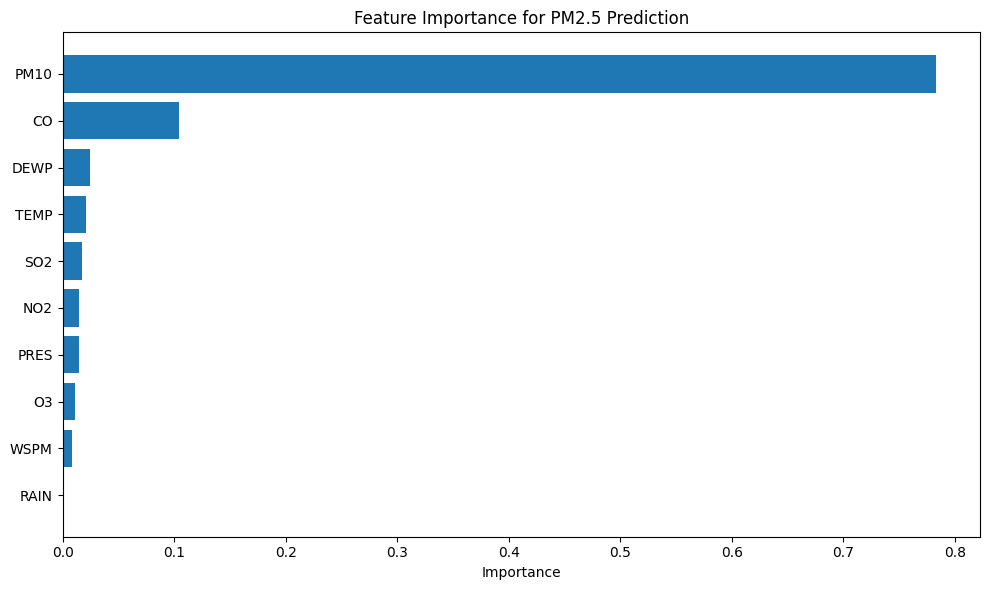

In [65]:
# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance for PM2.5 Prediction')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

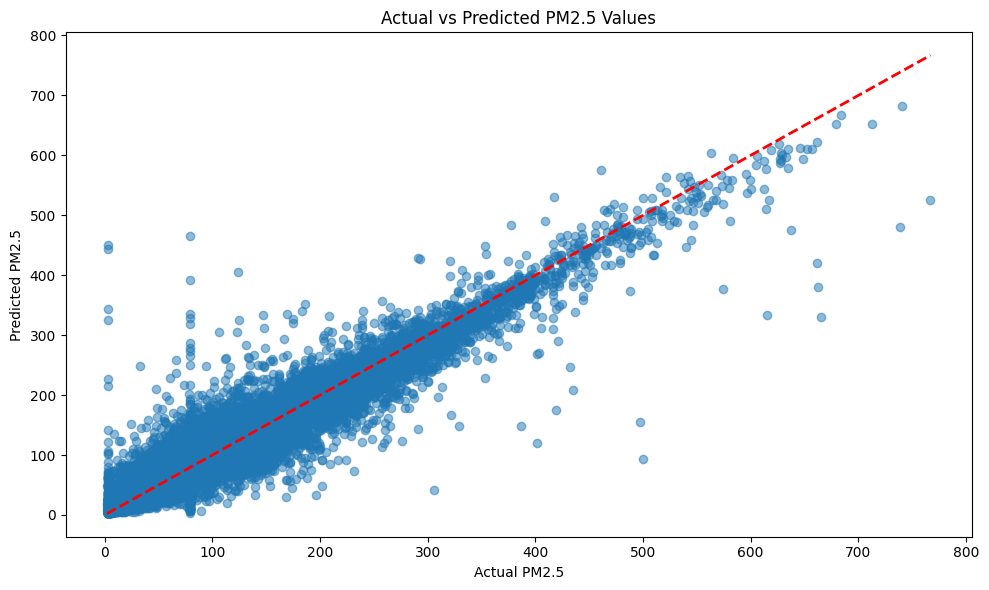

In [66]:
# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5 Values')
plt.tight_layout()
plt.show()

**OBSERVATION:**

The feature importance plot shows that PM10 is the most influential predictor of PM2.5 levels, followed by CO and NO2. The actual vs predicted plot shows a strong correlation between predicted and actual values, with points clustering around the ideal prediction line (red dashed line).

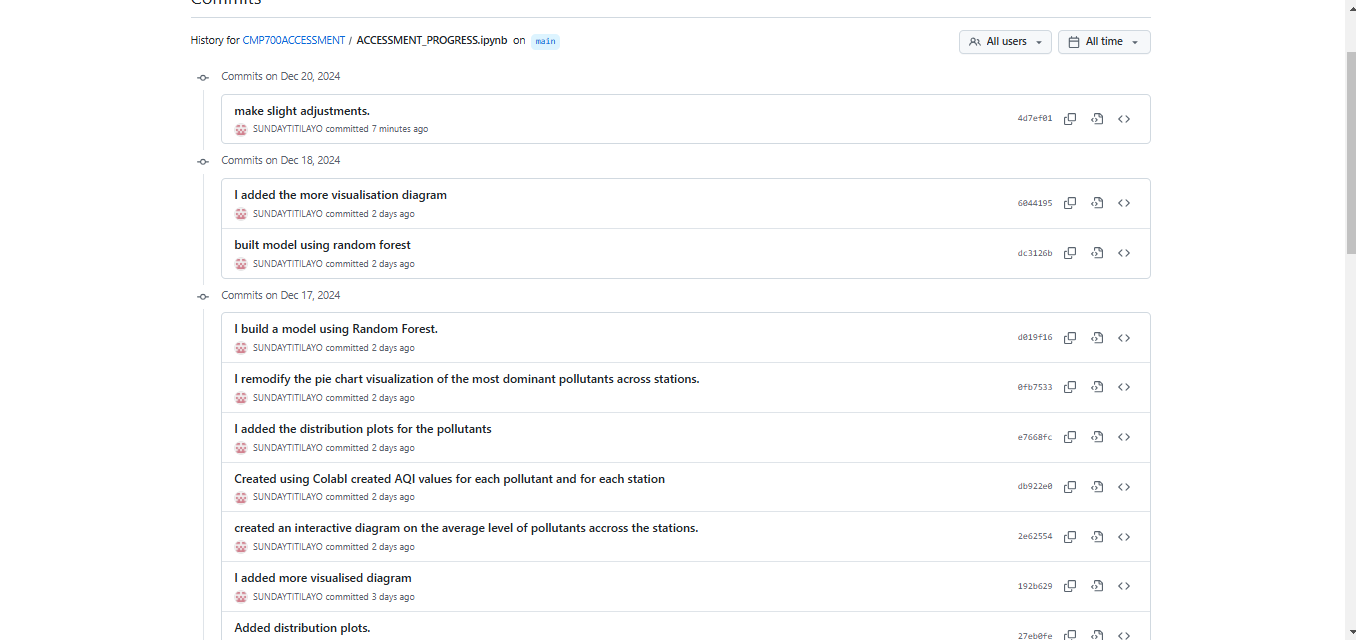

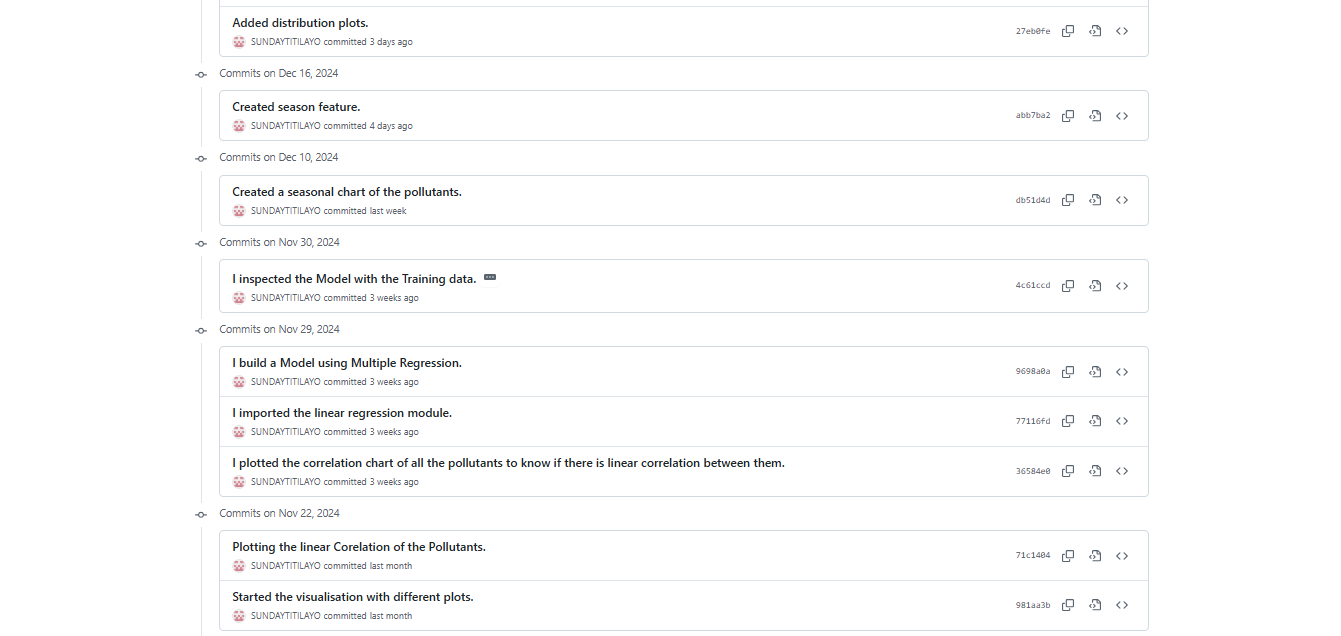

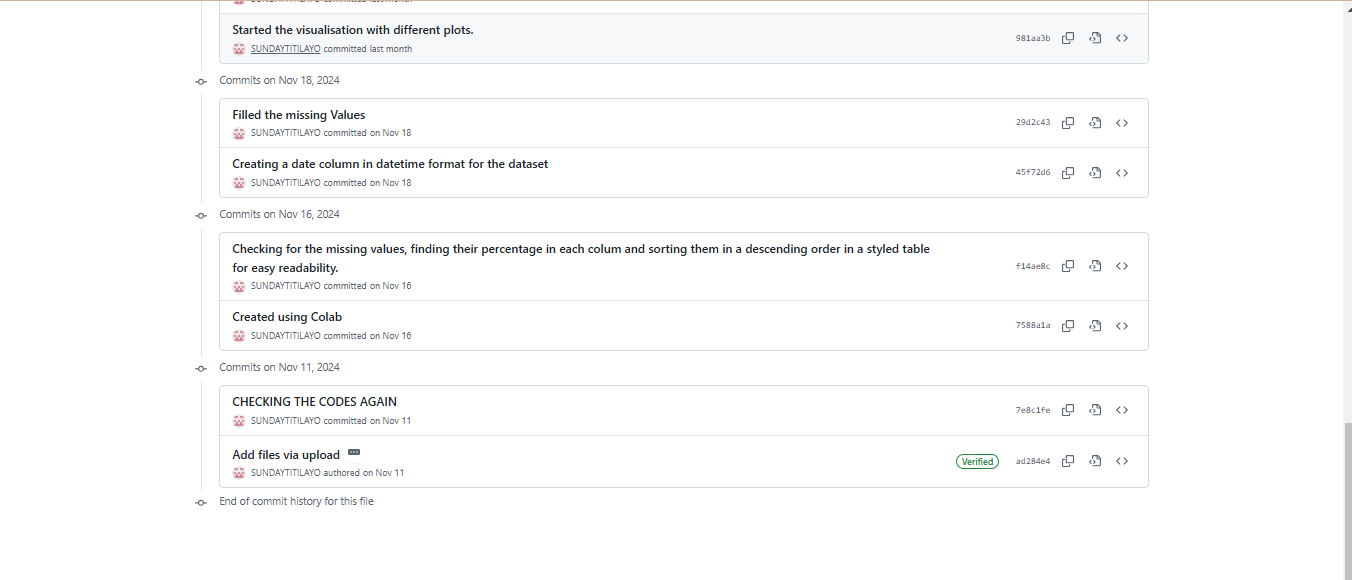